In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
SEED = 42
np.random.seed(SEED)  #Setting seed for reproducability

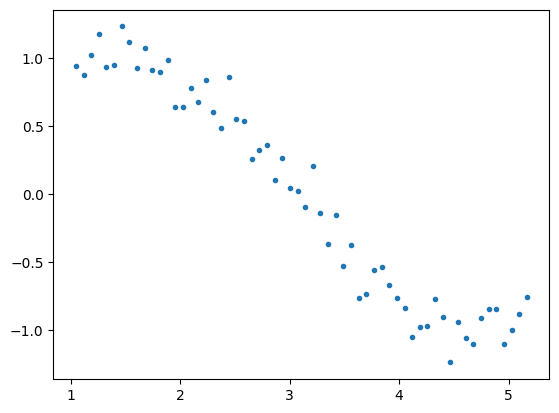

In [3]:
#Define input array with angles from 60deg to 300deg converted to radians
X = np.array([i*np.pi/180 for i in range(60,300,4)]).reshape(-1,1)
y = np.sin(X) + np.random.normal(0,0.15,len(X)).reshape(-1,1)
_ = plt.plot(X, y,'.')

## Particionamiento de datos

In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

## Regresión lineal

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Create model
linear_model = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit model
linear_model.fit(X_train, y_train)

# Make predictions
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Linear Model Mean Squared Error (train): {train_mse:.2f}')
print(f'Linear Model Mean Squared Error (test): {test_mse:.2f}')

Linear Model Mean Squared Error (train): 0.05
Linear Model Mean Squared Error (test): 0.04


In [6]:
def visualize_fit(X, y, model, title):
    # Visualize the fit
    x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = model.predict(x_range)
    plt.scatter(X, y, color='blue', label='Data')
    plt.plot(x_range, y_pred, color='red', label='Fit')
    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.title(title)
    plt.legend()
    plt.show()

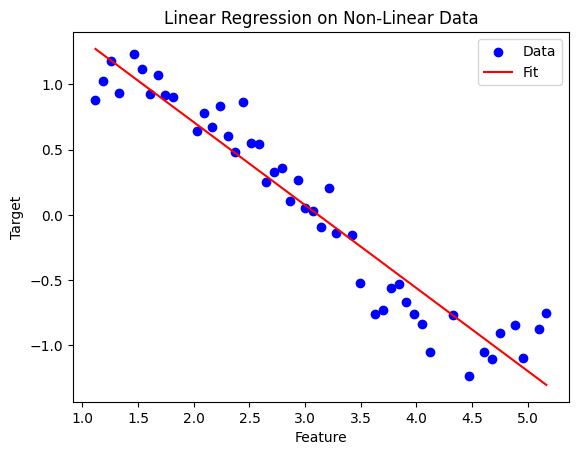

In [7]:
visualize_fit(X_train, y_train, linear_model, 'Linear Regression on Non-Linear Data')

## Regresión polinomial

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create PolynomialFeatures transformer
poly = PolynomialFeatures(degree=15)

# Create pipeline with polynomial features and linear regression
model = make_pipeline(poly, StandardScaler(), LinearRegression())
model.fit(X_train, y_train)

# Make predictions
y_train_pred_poly = model.predict(X_train)
y_test_pred_poly = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred_poly)
test_mse = mean_squared_error(y_test, y_test_pred_poly)
print(f'Polynomial Model Mean Squared Error (train): {train_mse:.2f}')
print(f'Polynomial Model Mean Squared Error (test): {test_mse:.2f}')

Polynomial Model Mean Squared Error (train): 0.01
Polynomial Model Mean Squared Error (test): 0.07


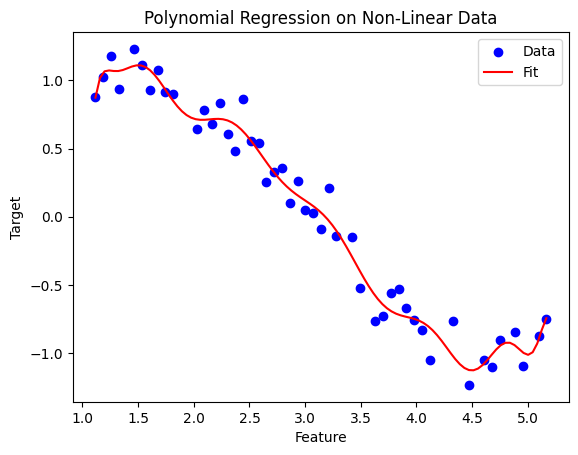

In [9]:
visualize_fit(X_train, y_train, model, 'Polynomial Regression on Non-Linear Data')

## Ridge regression

In [10]:
from sklearn.linear_model import Ridge

In [11]:
ridgereg = Ridge()

Pipeline

In [12]:
# Create model
ridgereg = make_pipeline(PolynomialFeatures(degree=15), StandardScaler(), Ridge(alpha=1e-1))
#1e-5 = 10^-5 = 0.00001

# Train the model
ridgereg.fit(X_train, y_train)

# Make predictions
y_train_pred_l2 = ridgereg.predict(X_train)
y_test_pred_l2 = ridgereg.predict(X_test)

# Evaluate the model
train_mse_l2 = mean_squared_error(y_train, y_train_pred_l2)
test_mse_l2 = mean_squared_error(y_test, y_test_pred_l2)

print(f'Ridge Regression Model Mean Squared Error (train): {train_mse_l2:.2f}')
print(f'Ridge Regression Model Mean Squared Error (test): {test_mse_l2:.2f}')

Ridge Regression Model Mean Squared Error (train): 0.02
Ridge Regression Model Mean Squared Error (test): 0.02


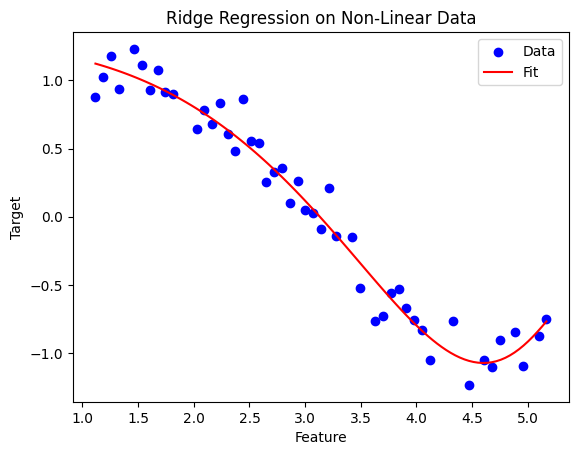

In [13]:
visualize_fit(X_train, y_train, ridgereg, 'Ridge Regression on Non-Linear Data')

### Get params

In [14]:
ridgereg.get_params()

{'memory': None,
 'steps': [('polynomialfeatures', PolynomialFeatures(degree=15)),
  ('standardscaler', StandardScaler()),
  ('ridge', Ridge(alpha=0.1))],
 'verbose': False,
 'polynomialfeatures': PolynomialFeatures(degree=15),
 'standardscaler': StandardScaler(),
 'ridge': Ridge(alpha=0.1),
 'polynomialfeatures__degree': 15,
 'polynomialfeatures__include_bias': True,
 'polynomialfeatures__interaction_only': False,
 'polynomialfeatures__order': 'C',
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'ridge__alpha': 0.1,
 'ridge__copy_X': True,
 'ridge__fit_intercept': True,
 'ridge__max_iter': None,
 'ridge__positive': False,
 'ridge__random_state': None,
 'ridge__solver': 'auto',
 'ridge__tol': 0.0001}

In [15]:
ridgereg.get_params()['steps']

[('polynomialfeatures', PolynomialFeatures(degree=15)),
 ('standardscaler', StandardScaler()),
 ('ridge', Ridge(alpha=0.1))]

In [16]:
ridgereg.named_steps['ridge'].coef_

array([[ 0.        , -0.0277684 , -0.49649993, -0.50242369, -0.31872394,
        -0.10615647,  0.06562322,  0.17674133,  0.22948159,  0.23406464,
         0.20221943,  0.14461092,  0.07003247, -0.01464861, -0.10426023,
        -0.19501771]])

In [17]:
ridgereg.named_steps

{'polynomialfeatures': PolynomialFeatures(degree=15),
 'standardscaler': StandardScaler(),
 'ridge': Ridge(alpha=0.1)}

In [18]:
print(ridgereg)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=15)),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.1))])


### Set params

In [19]:
ridgereg.set_params(ridge__alpha=50)
ridgereg.get_params()

{'memory': None,
 'steps': [('polynomialfeatures', PolynomialFeatures(degree=15)),
  ('standardscaler', StandardScaler()),
  ('ridge', Ridge(alpha=50))],
 'verbose': False,
 'polynomialfeatures': PolynomialFeatures(degree=15),
 'standardscaler': StandardScaler(),
 'ridge': Ridge(alpha=50),
 'polynomialfeatures__degree': 15,
 'polynomialfeatures__include_bias': True,
 'polynomialfeatures__interaction_only': False,
 'polynomialfeatures__order': 'C',
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'ridge__alpha': 50,
 'ridge__copy_X': True,
 'ridge__fit_intercept': True,
 'ridge__max_iter': None,
 'ridge__positive': False,
 'ridge__random_state': None,
 'ridge__solver': 'auto',
 'ridge__tol': 0.0001}

### Encontrar el mejor alpha

In [20]:
np.logspace(-4, 1, 100)

array([1.00000000e-04, 1.12332403e-04, 1.26185688e-04, 1.41747416e-04,
       1.59228279e-04, 1.78864953e-04, 2.00923300e-04, 2.25701972e-04,
       2.53536449e-04, 2.84803587e-04, 3.19926714e-04, 3.59381366e-04,
       4.03701726e-04, 4.53487851e-04, 5.09413801e-04, 5.72236766e-04,
       6.42807312e-04, 7.22080902e-04, 8.11130831e-04, 9.11162756e-04,
       1.02353102e-03, 1.14975700e-03, 1.29154967e-03, 1.45082878e-03,
       1.62975083e-03, 1.83073828e-03, 2.05651231e-03, 2.31012970e-03,
       2.59502421e-03, 2.91505306e-03, 3.27454916e-03, 3.67837977e-03,
       4.13201240e-03, 4.64158883e-03, 5.21400829e-03, 5.85702082e-03,
       6.57933225e-03, 7.39072203e-03, 8.30217568e-03, 9.32603347e-03,
       1.04761575e-02, 1.17681195e-02, 1.32194115e-02, 1.48496826e-02,
       1.66810054e-02, 1.87381742e-02, 2.10490414e-02, 2.36448941e-02,
       2.65608778e-02, 2.98364724e-02, 3.35160265e-02, 3.76493581e-02,
       4.22924287e-02, 4.75081016e-02, 5.33669923e-02, 5.99484250e-02,
      

In [21]:
#alphas = [0, 0.1, 1.0, 10.0]
alphas = np.logspace(-4, 1, 100)

mse_test_res = []
mse_train_res = []
coefficients = []
for alpha in alphas:
    # Change ridge params
    ridgereg.set_params(ridge__alpha=alpha)

    # Train the model
    ridgereg.fit(X_train, y_train)

    # Make predictions
    y_test_pred = ridgereg.predict(X_test)
    y_train_pred = ridgereg.predict(X_train)

    # Evaluate the model
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    mse_test_res.append(mse_test)
    mse_train_res.append(mse_train)

    # Save the coefficients
    coefficients.append(ridgereg.named_steps['ridge'].coef_)

###  Visualize errors

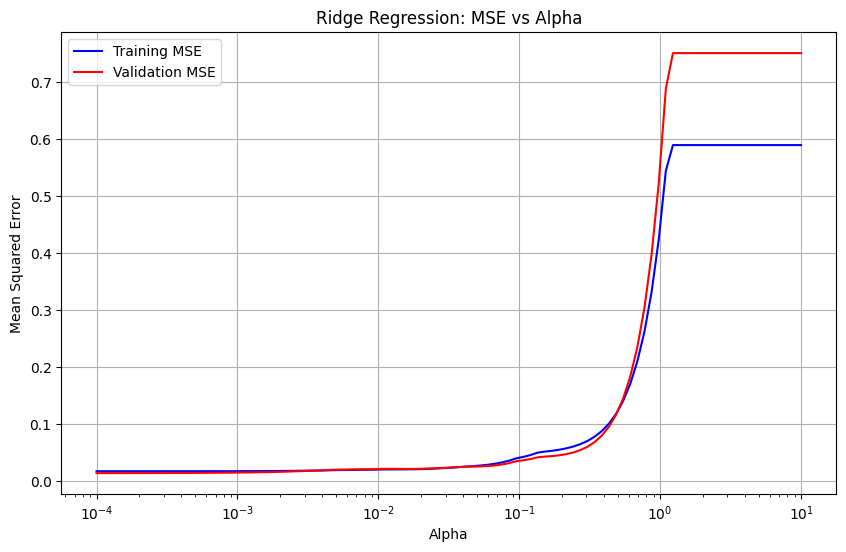

In [76]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_train_res, label='Training MSE', color='blue')
plt.plot(alphas, mse_test_res, label='Validation MSE', color='red')

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression: MSE vs Alpha')
plt.legend()
plt.grid()
plt.show()

In [23]:
best_index = np.argmin(mse_test_res)
best_alpha = alphas[best_index]
print(best_alpha)

0.0001


### Visualización de coeficientes

In [24]:
# Convert coefficients list to a numpy array for easier manipulation
coeff_array = np.array(coefficients)

In [25]:
coeff_array.shape

(100, 1, 16)

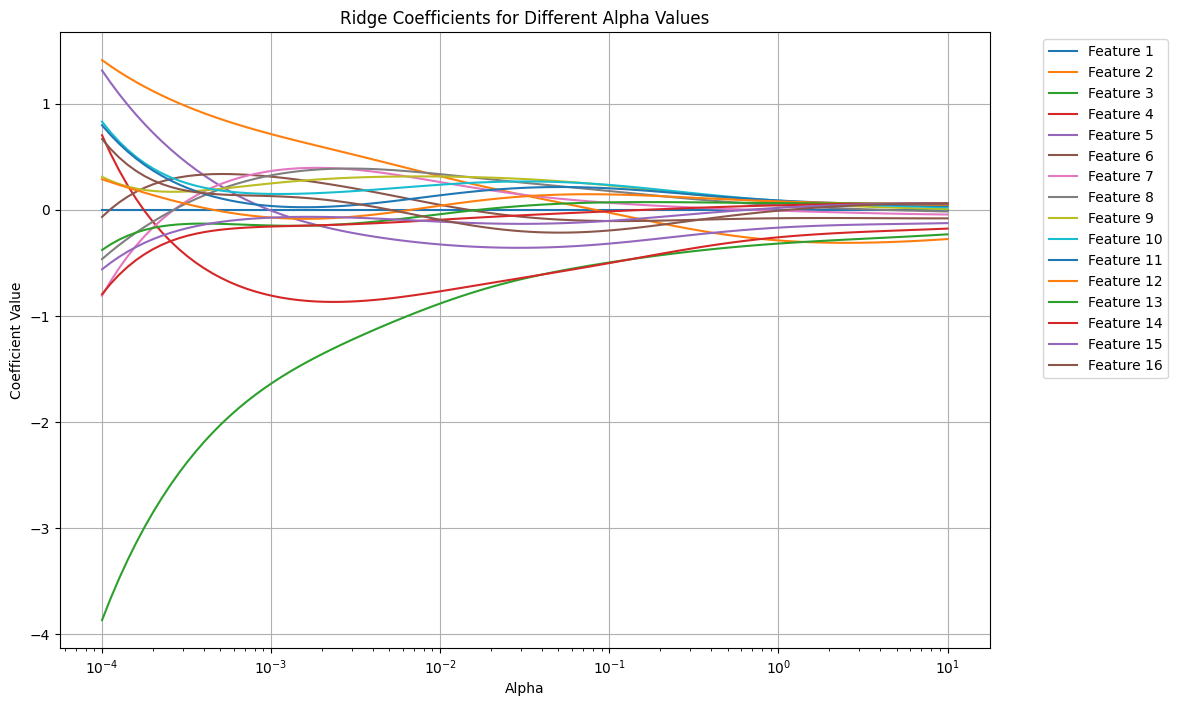

In [26]:
# Plot the coefficients for different alpha values
plt.figure(figsize=(12, 8))

# Number of features in the dataset
n_features = coeff_array.shape[-1]

# Plot each feature's coefficient
for i in range(n_features):
    plt.plot(alphas, coeff_array[:,0,i], label=f'Feature {i+1}')

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Ridge Coefficients for Different Alpha Values')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.show()

### Entrenamiento con mejor alpha

Ridge Regression Model Mean Squared Error (train): 0.02
Ridge Regression Model Mean Squared Error (test): 0.01


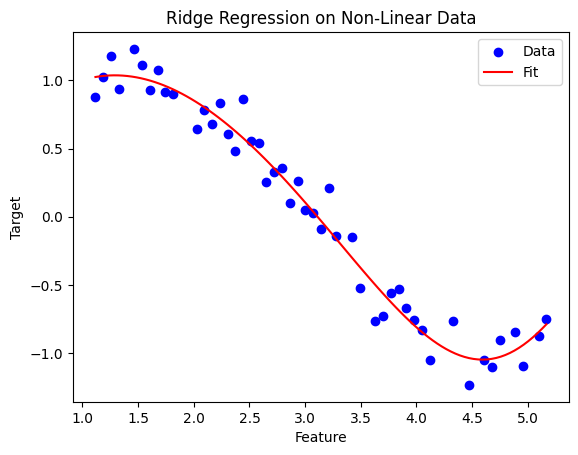

In [27]:
ridgereg = make_pipeline(poly, StandardScaler(), Ridge(alpha=0.0001))

ridgereg.fit(X_train, y_train)

# Make predictions
y_train_pred_l2 = ridgereg.predict(X_train)
y_test_pred_l2 = ridgereg.predict(X_test)

# Evaluate the model
train_mse_l2 = mean_squared_error(y_train, y_train_pred_l2)
test_mse_l2 = mean_squared_error(y_test, y_test_pred_l2)

print(f'Ridge Regression Model Mean Squared Error (train): {train_mse_l2:.2f}')
print(f'Ridge Regression Model Mean Squared Error (test): {test_mse_l2:.2f}')

visualize_fit(X_train, y_train, ridgereg, 'Ridge Regression on Non-Linear Data')

### Usando cross validation

In [28]:
from sklearn.linear_model import RidgeCV

Ridge Regression Model Mean Squared Error (train): 0.02
Ridge Regression Model Mean Squared Error (test): 0.02


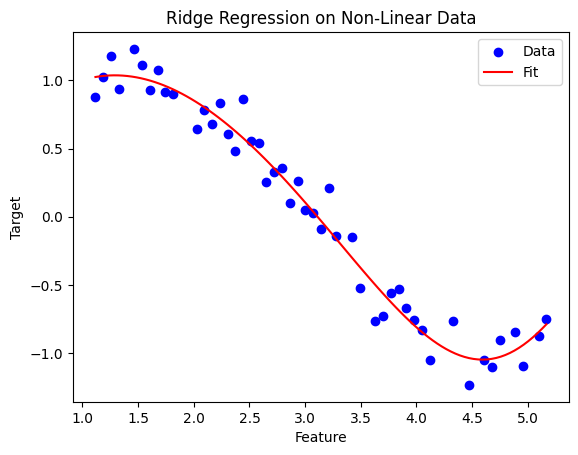

In [29]:
#alphas = [0.01, 0.1, 1.0, 10.0]
alphas = np.logspace(-4, 1, 100)

# Model
ridge_cv = make_pipeline(poly, StandardScaler(), RidgeCV(alphas=alphas))

# Train model
ridge_cv.fit(X_train, y_train)

# Make predictions
y_train_pred_l2 = ridge_cv.predict(X_train)
y_test_pred_l2 = ridge_cv.predict(X_test)

# Evaluate the model
train_mse_l2 = mean_squared_error(y_train, y_train_pred_l2)
test_mse_l2 = mean_squared_error(y_test, y_test_pred_l2)

print(f'Ridge Regression Model Mean Squared Error (train): {train_mse_l2:.2f}')
print(f'Ridge Regression Model Mean Squared Error (test): {test_mse_l2:.2f}')

visualize_fit(X_train, y_train, ridgereg, 'Ridge Regression on Non-Linear Data')

In [75]:
#ridge_cv.named_steps
type(ridge_cv.named_steps['ridgecv'])

sklearn.linear_model._ridge.RidgeCV

In [31]:
best_alpha = ridge_cv.named_steps['ridgecv'].alpha_
print(f'Best alpha: {best_alpha}')

Best alpha: 0.04229242874389499


In [32]:
best_score = ridge_cv.named_steps['ridgecv'].best_score_
print(f'Best cross-validation score: {best_score}')

Best cross-validation score: -0.021496995093779753


In [33]:
best_coef = ridge_cv.named_steps['ridgecv'].coef_
print(f'Best cross-validation coefficient: {best_coef}')

Best cross-validation coefficient: [[ 0.          0.09412183 -0.60221714 -0.60440864 -0.35461698 -0.08502743
   0.11703063  0.23454457  0.27783678  0.26486253  0.21333155  0.13806834
   0.05052369 -0.04090845 -0.13033573 -0.21380273]]


### Usando grid-search

In [34]:
ridge = make_pipeline(poly, StandardScaler(), Ridge())

ridge.get_params()

{'memory': None,
 'steps': [('polynomialfeatures', PolynomialFeatures(degree=15)),
  ('standardscaler', StandardScaler()),
  ('ridge', Ridge())],
 'verbose': False,
 'polynomialfeatures': PolynomialFeatures(degree=15),
 'standardscaler': StandardScaler(),
 'ridge': Ridge(),
 'polynomialfeatures__degree': 15,
 'polynomialfeatures__include_bias': True,
 'polynomialfeatures__interaction_only': False,
 'polynomialfeatures__order': 'C',
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'ridge__alpha': 1.0,
 'ridge__copy_X': True,
 'ridge__fit_intercept': True,
 'ridge__max_iter': None,
 'ridge__positive': False,
 'ridge__random_state': None,
 'ridge__solver': 'auto',
 'ridge__tol': 0.0001}

In [35]:
prefix = 'ridge__'
# Define the grid of alpha values to search
param_grid = {
    prefix + 'alpha': alphas,
    #prefix + 'fit_intercept':[True, False],
    #'polynomialfeatures__degree': [2, 5, 10]
}

In [36]:
from sklearn.model_selection import GridSearchCV

# Model
ridge_pipeline = make_pipeline(poly, StandardScaler(), Ridge())

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=ridge_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

In [37]:
# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=15)),
                                       ('standardscaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': array([1.00000000e-04, 1.12332403e-04, 1.26185688e-04, 1.41747416e-04,
       1.59228279e-04, 1.78864953e-04, 2.00923300e-04, 2.25701972e-04,
       2.53536449e-04, 2.84803587e-04, 3.19926714e-0...
       6.89261210e-01, 7.74263683e-01, 8.69749003e-01, 9.77009957e-01,
       1.09749877e+00, 1.23284674e+00, 1.38488637e+00, 1.55567614e+00,
       1.74752840e+00, 1.96304065e+00, 2.20513074e+00, 2.47707636e+00,
       2.78255940e+00, 3.12571585e+00, 3.51119173e+00, 3.94420606e+00,
       4.43062146e+00, 4.97702356e+00, 5.59081018e+00, 6.28029144e+00,
       7.05480231e+00, 7.92482898e+00, 8.90215085e+00, 1.00000000e+01])},
             scoring='neg_mean_squared_error')

In [38]:
grid_search.best_params_

{'ridge__alpha': 0.04229242874389499}

In [39]:
# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_[prefix + 'alpha']

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Best Alpha: {best_alpha}")

Mean Squared Error: 0.016084921213671142
Best Alpha: 0.04229242874389499


In [40]:
# Get detailed results from Grid Search
results = grid_search.cv_results_
alphas_ = []
# Print grid search results
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Mean Test Score: {-mean_score:.4f} for Alpha: {params[prefix + 'alpha']}")
    alphas_.append(params[prefix + 'alpha'])

Mean Test Score: 0.0231 for Alpha: 0.0001
Mean Test Score: 0.0230 for Alpha: 0.00011233240329780277
Mean Test Score: 0.0230 for Alpha: 0.0001261856883066021
Mean Test Score: 0.0229 for Alpha: 0.00014174741629268049
Mean Test Score: 0.0229 for Alpha: 0.00015922827933410923
Mean Test Score: 0.0228 for Alpha: 0.0001788649529057435
Mean Test Score: 0.0228 for Alpha: 0.00020092330025650479
Mean Test Score: 0.0227 for Alpha: 0.0002257019719633919
Mean Test Score: 0.0227 for Alpha: 0.00025353644939701115
Mean Test Score: 0.0226 for Alpha: 0.0002848035868435802
Mean Test Score: 0.0226 for Alpha: 0.00031992671377973844
Mean Test Score: 0.0225 for Alpha: 0.00035938136638046257
Mean Test Score: 0.0225 for Alpha: 0.0004037017258596554
Mean Test Score: 0.0224 for Alpha: 0.00045348785081285824
Mean Test Score: 0.0224 for Alpha: 0.000509413801481638
Mean Test Score: 0.0223 for Alpha: 0.0005722367659350221
Mean Test Score: 0.0223 for Alpha: 0.0006428073117284319
Mean Test Score: 0.0223 for Alpha: 0.00

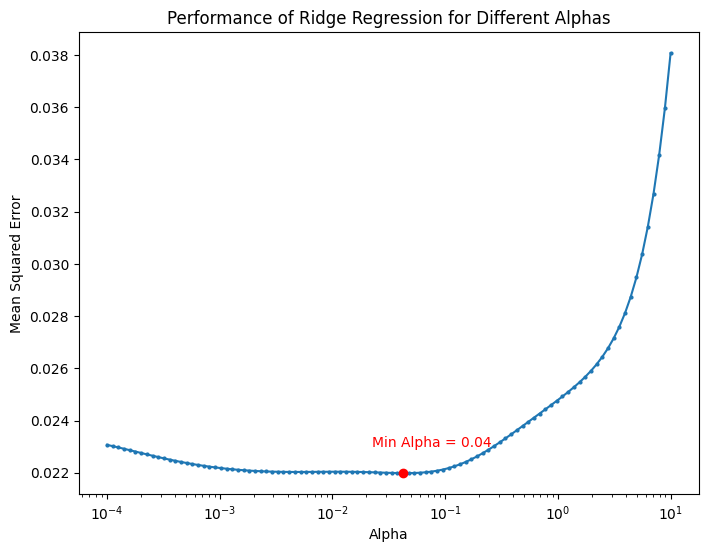

In [41]:
# Optional: Plot the performance of different alphas
import matplotlib.pyplot as plt

# Extract mean test scores for plotting
mean_scores = -results['mean_test_score']
alphas = param_grid[prefix + 'alpha']

plt.figure(figsize=(8, 6))
plt.plot(alphas, mean_scores, marker='o', markersize=2)
#plt.plot(alphas_, mean_scores, marker='o', markersize=2)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Performance of Ridge Regression for Different Alphas')

# Find the index of the minimum score
min_index = np.argmin(mean_scores)
min_alpha = alphas[min_index]
min_score = mean_scores[min_index]

# Highlight the point with the minimum mean squared error
plt.scatter(min_alpha, min_score, color='red', zorder=5, label=f'Min Alpha = {min_alpha:.2f}')
plt.text(min_alpha - 0.02 , min_score + 0.001, f'Min Alpha = {min_alpha:.2f}', color='red')

plt.show()

## Lasso

In [42]:
from sklearn.linear_model import Lasso

In [43]:
lasso_reg = Lasso()

Pipeline

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.630e-01, tolerance: 2.832e-03
  model = cd_fast.enet_coordinate_descent(


Lasso Regression Model Mean Squared Error (train): 0.02
Lasso Regression Model Mean Squared Error (test): 0.01


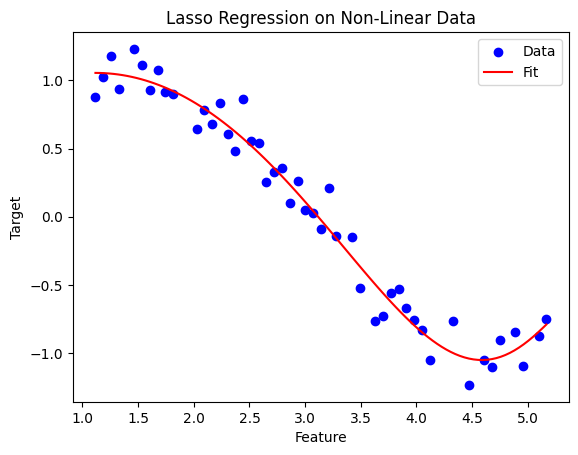

In [44]:
# Model
lasso_reg = make_pipeline(poly, StandardScaler(), Lasso(1e-5))

# Train
lasso_reg.fit(X_train, y_train)

# Make predictions
y_train_pred = lasso_reg.predict(X_train)
y_test_pred = lasso_reg.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Lasso Regression Model Mean Squared Error (train): {train_mse:.2f}')
print(f'Lasso Regression Model Mean Squared Error (test): {test_mse:.2f}')

visualize_fit(X_train, y_train, lasso_reg, 'Lasso Regression on Non-Linear Data')

In [45]:
lasso_reg.get_params()

{'memory': None,
 'steps': [('polynomialfeatures', PolynomialFeatures(degree=15)),
  ('standardscaler', StandardScaler()),
  ('lasso', Lasso(alpha=1e-05))],
 'verbose': False,
 'polynomialfeatures': PolynomialFeatures(degree=15),
 'standardscaler': StandardScaler(),
 'lasso': Lasso(alpha=1e-05),
 'polynomialfeatures__degree': 15,
 'polynomialfeatures__include_bias': True,
 'polynomialfeatures__interaction_only': False,
 'polynomialfeatures__order': 'C',
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'lasso__alpha': 1e-05,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': None,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False}

In [46]:
lasso_reg.get_params()['steps']

[('polynomialfeatures', PolynomialFeatures(degree=15)),
 ('standardscaler', StandardScaler()),
 ('lasso', Lasso(alpha=1e-05))]

In [47]:
lasso_reg.set_params(lasso__alpha=3.0)  # Change alpha to 1.0
lasso_reg.get_params()

{'memory': None,
 'steps': [('polynomialfeatures', PolynomialFeatures(degree=15)),
  ('standardscaler', StandardScaler()),
  ('lasso', Lasso(alpha=3.0))],
 'verbose': False,
 'polynomialfeatures': PolynomialFeatures(degree=15),
 'standardscaler': StandardScaler(),
 'lasso': Lasso(alpha=3.0),
 'polynomialfeatures__degree': 15,
 'polynomialfeatures__include_bias': True,
 'polynomialfeatures__interaction_only': False,
 'polynomialfeatures__order': 'C',
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'lasso__alpha': 3.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': None,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False}

### Encontrar el mejor alpha

In [48]:
lasso_reg.set_params(lasso__max_iter=100000)
#alphas = [0.1, 1.0, 10.0]
alphas = np.logspace(-5, 1, 100)

mse_test_res = []
mse_train_res = []
coefficients = []
for alpha in alphas:
    lasso_reg.set_params(lasso__alpha=alpha)
    lasso_reg.fit(X_train, y_train)

    # Make predictions
    y_test_pred = lasso_reg.predict(X_test)
    y_train_pred = lasso_reg.predict(X_train)

    # Evaluate the model
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    mse_test_res.append(mse_test)
    mse_train_res.append(mse_train)
    coefficients.append(lasso_reg.named_steps['lasso'].coef_)

In [49]:
alphas

array([1.00000000e-05, 1.14975700e-05, 1.32194115e-05, 1.51991108e-05,
       1.74752840e-05, 2.00923300e-05, 2.31012970e-05, 2.65608778e-05,
       3.05385551e-05, 3.51119173e-05, 4.03701726e-05, 4.64158883e-05,
       5.33669923e-05, 6.13590727e-05, 7.05480231e-05, 8.11130831e-05,
       9.32603347e-05, 1.07226722e-04, 1.23284674e-04, 1.41747416e-04,
       1.62975083e-04, 1.87381742e-04, 2.15443469e-04, 2.47707636e-04,
       2.84803587e-04, 3.27454916e-04, 3.76493581e-04, 4.32876128e-04,
       4.97702356e-04, 5.72236766e-04, 6.57933225e-04, 7.56463328e-04,
       8.69749003e-04, 1.00000000e-03, 1.14975700e-03, 1.32194115e-03,
       1.51991108e-03, 1.74752840e-03, 2.00923300e-03, 2.31012970e-03,
       2.65608778e-03, 3.05385551e-03, 3.51119173e-03, 4.03701726e-03,
       4.64158883e-03, 5.33669923e-03, 6.13590727e-03, 7.05480231e-03,
       8.11130831e-03, 9.32603347e-03, 1.07226722e-02, 1.23284674e-02,
       1.41747416e-02, 1.62975083e-02, 1.87381742e-02, 2.15443469e-02,
      

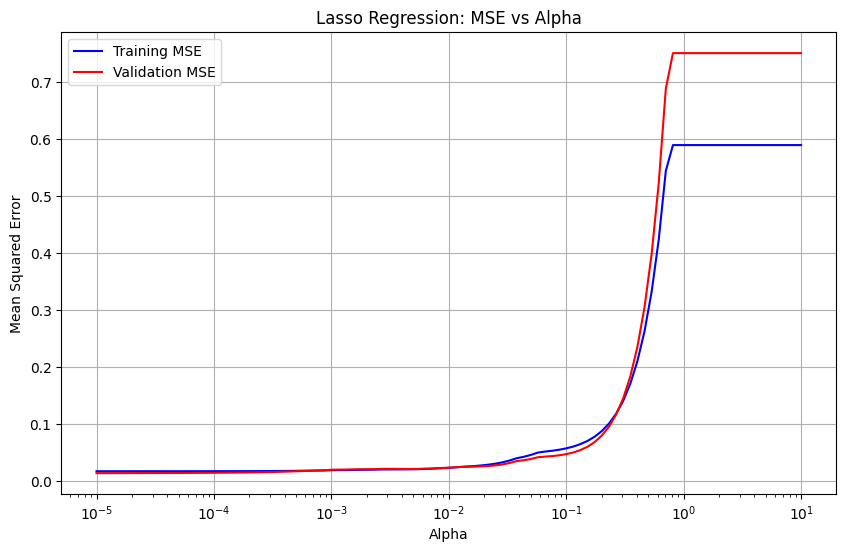

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_train_res, label='Training MSE', color='blue')
plt.plot(alphas, mse_test_res, label='Validation MSE', color='red')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Lasso Regression: MSE vs Alpha')
plt.legend()
plt.grid()
plt.show()

In [51]:
best_index = np.argmin(mse_test_res)
best_alpha = alphas[best_index]
print(best_alpha)

1e-05


### Visualización de coeficientes

In [52]:
# Convert coefficients list to a numpy array for easier manipulation
coeff_array = np.array(coefficients)

In [53]:
coeff_array.shape

(100, 16)

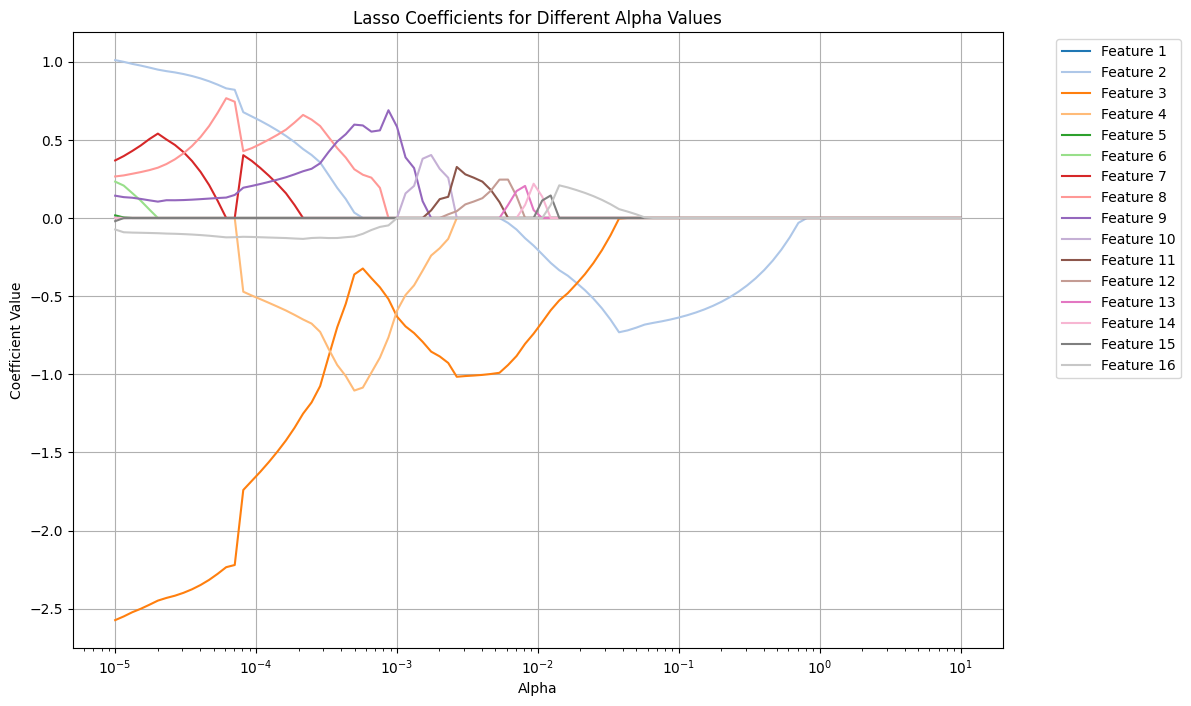

In [54]:
# Plot the coefficients for different alpha values
plt.figure(figsize=(12, 8))

# Number of features in the dataset
n_features = coeff_array.shape[-1]

# Use the 'tab20' colormap which has 20 distinct colors
colors = plt.get_cmap('tab20', 20)

# Plot each feature's coefficient
for i in range(n_features):
    plt.plot(alphas, coeff_array[:,i], label=f'Feature {i+1}', color=colors(i))

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficients for Different Alpha Values')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.show()

### Entrenamiento con mejor alpha

Lasso Regression Model Mean Squared Error (train): 0.02
Lasso Regression Model Mean Squared Error (test): 0.01


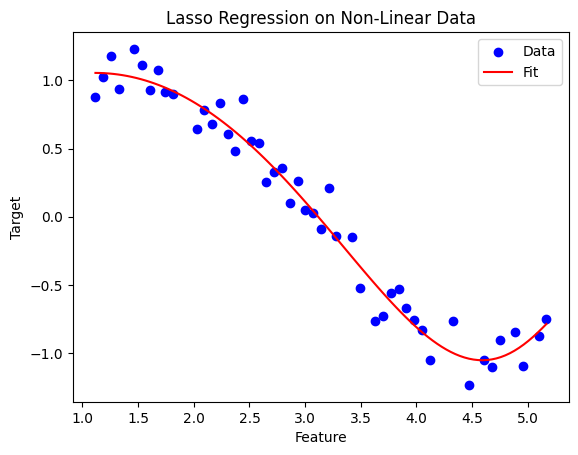

In [55]:
lasso_reg = make_pipeline(poly, StandardScaler(), Lasso(alpha=0.0001, max_iter=10000))

lasso_reg.fit(X_train, y_train)

# Make predictions
y_train_pred = lasso_reg.predict(X_train)
y_test_pred = lasso_reg.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Lasso Regression Model Mean Squared Error (train): {train_mse:.2f}')
print(f'Lasso Regression Model Mean Squared Error (test): {test_mse:.2f}')

visualize_fit(X_train, y_train, lasso_reg, 'Lasso Regression on Non-Linear Data')

### Selección de características

In [56]:
# Get the coefficients
best_coefficients = lasso_reg.named_steps["lasso"].coef_

# Identify the features with non-zero coefficients
non_zero_features = np.where(best_coefficients != 0)[0]

print(f"Features selected: {non_zero_features}")
print(f"Coefficients: {best_coefficients}")

Features selected: [ 1  2  3  6  7  8 15]
Coefficients: [ 0.          0.63607568 -1.65305035 -0.5076939  -0.          0.
  0.34302215  0.4596859   0.21119822  0.          0.          0.
 -0.         -0.         -0.         -0.12222647]


### Usando cross validation

In [57]:
from sklearn.linear_model import LassoCV

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Lasso Regression Model Mean Squared Error (train): 0.02
Lasso Regression Model Mean Squared Error (test): 0.01


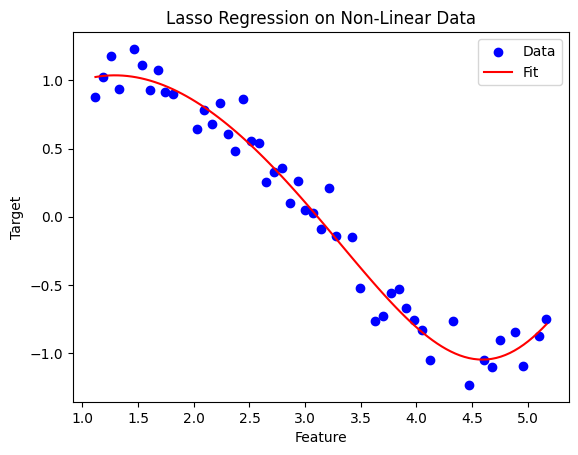

In [58]:
#alphas = [0.01, 0.1, 1.0, 10.0]
alphas = np.logspace(-4, 1, 100)
lasso_cv = make_pipeline(poly, StandardScaler(), LassoCV(alphas=alphas, max_iter=100000))#, store_cv_results=True))

lasso_cv.fit(X_train, y_train)

# Make predictions
y_train_pred = lasso_cv.predict(X_train)
y_test_pred = lasso_cv.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Lasso Regression Model Mean Squared Error (train): {train_mse:.2f}')
print(f'Lasso Regression Model Mean Squared Error (test): {test_mse:.2f}')

visualize_fit(X_train, y_train, ridgereg, 'Lasso Regression on Non-Linear Data')

In [59]:
lasso_cv.named_steps

{'polynomialfeatures': PolynomialFeatures(degree=15),
 'standardscaler': StandardScaler(),
 'lassocv': LassoCV(alphas=array([1.00000000e-04, 1.12332403e-04, 1.26185688e-04, 1.41747416e-04,
        1.59228279e-04, 1.78864953e-04, 2.00923300e-04, 2.25701972e-04,
        2.53536449e-04, 2.84803587e-04, 3.19926714e-04, 3.59381366e-04,
        4.03701726e-04, 4.53487851e-04, 5.09413801e-04, 5.72236766e-04,
        6.42807312e-04, 7.22080902e-04, 8.11130831e-04, 9.11162756e-04,
        1.02353102e-03, 1.14975700e-0...
        6.89261210e-01, 7.74263683e-01, 8.69749003e-01, 9.77009957e-01,
        1.09749877e+00, 1.23284674e+00, 1.38488637e+00, 1.55567614e+00,
        1.74752840e+00, 1.96304065e+00, 2.20513074e+00, 2.47707636e+00,
        2.78255940e+00, 3.12571585e+00, 3.51119173e+00, 3.94420606e+00,
        4.43062146e+00, 4.97702356e+00, 5.59081018e+00, 6.28029144e+00,
        7.05480231e+00, 7.92482898e+00, 8.90215085e+00, 1.00000000e+01]),
         max_iter=100000)}

In [60]:
dir(lasso_cv.named_steps['lassocv'])

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_estimator',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_is_multitask',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',

In [61]:
best_alpha = lasso_cv.named_steps['lassocv'].alpha_
print(f'Best alpha: {best_alpha}')

Best alpha: 0.0001


In [62]:
# Make predictions on the test set
y_test_pred = lasso_cv.predict(X_test)

# Evaluate the model's performance
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {test_mse}")

Mean Squared Error: 0.014195548839391876


In [63]:
best_coef = lasso_cv.named_steps['lassocv'].coef_
print(f'Best cross-validation coefficient: {best_coef}')

Best cross-validation coefficient: [ 0.          0.63607568 -1.65305035 -0.5076939  -0.          0.
  0.34302215  0.4596859   0.21119822  0.          0.          0.
 -0.         -0.         -0.         -0.12222647]


### Usando grid-search

In [64]:
prefix = 'lasso__'
# Define the grid of alpha values to search
#param_grid = {prefix + 'alpha': [0.01, 0.1, 1.0, 10.0]}
param_grid = {prefix + 'alpha': alphas}

In [65]:
from sklearn.model_selection import GridSearchCV

lasso_pipe = make_pipeline(poly, StandardScaler(), Lasso(max_iter=10000))

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=lasso_pipe, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

In [66]:
# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.109e-03, tolerance: 2.060e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.572e-03, tolerance: 2.306e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.415e-03, tolerance: 2.274e

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=15)),
                                       ('standardscaler', StandardScaler()),
                                       ('lasso', Lasso(max_iter=10000))]),
             param_grid={'lasso__alpha': array([1.00000000e-04, 1.12332403e-04, 1.26185688e-04, 1.41747416e-04,
       1.59228279e-04, 1.78864953e-04, 2.00923300e-04, 2.25701972e-04,
       2.53536449e-04, 2.84803587e-04...
       6.89261210e-01, 7.74263683e-01, 8.69749003e-01, 9.77009957e-01,
       1.09749877e+00, 1.23284674e+00, 1.38488637e+00, 1.55567614e+00,
       1.74752840e+00, 1.96304065e+00, 2.20513074e+00, 2.47707636e+00,
       2.78255940e+00, 3.12571585e+00, 3.51119173e+00, 3.94420606e+00,
       4.43062146e+00, 4.97702356e+00, 5.59081018e+00, 6.28029144e+00,
       7.05480231e+00, 7.92482898e+00, 8.90215085e+00, 1.00000000e+01])},
             scoring='neg_mean_squared_error')

In [67]:
# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_[prefix + 'alpha']

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Best Alpha: {best_alpha}")

Mean Squared Error: 0.01454854349186492
Best Alpha: 0.00015922827933410923


In [68]:
# Get detailed results from Grid Search
results = grid_search.cv_results_

# Print grid search results
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Mean Test Score: {-mean_score:.4f} for Alpha: {params[prefix + 'alpha']}")

Mean Test Score: 0.0217 for Alpha: 0.0001
Mean Test Score: 0.0217 for Alpha: 0.00011233240329780277
Mean Test Score: 0.0217 for Alpha: 0.0001261856883066021
Mean Test Score: 0.0217 for Alpha: 0.00014174741629268049
Mean Test Score: 0.0217 for Alpha: 0.00015922827933410923
Mean Test Score: 0.0217 for Alpha: 0.0001788649529057435
Mean Test Score: 0.0218 for Alpha: 0.00020092330025650479
Mean Test Score: 0.0218 for Alpha: 0.0002257019719633919
Mean Test Score: 0.0218 for Alpha: 0.00025353644939701115
Mean Test Score: 0.0218 for Alpha: 0.0002848035868435802
Mean Test Score: 0.0218 for Alpha: 0.00031992671377973844
Mean Test Score: 0.0218 for Alpha: 0.00035938136638046257
Mean Test Score: 0.0218 for Alpha: 0.0004037017258596554
Mean Test Score: 0.0218 for Alpha: 0.00045348785081285824
Mean Test Score: 0.0218 for Alpha: 0.000509413801481638
Mean Test Score: 0.0218 for Alpha: 0.0005722367659350221
Mean Test Score: 0.0218 for Alpha: 0.0006428073117284319
Mean Test Score: 0.0219 for Alpha: 0.00

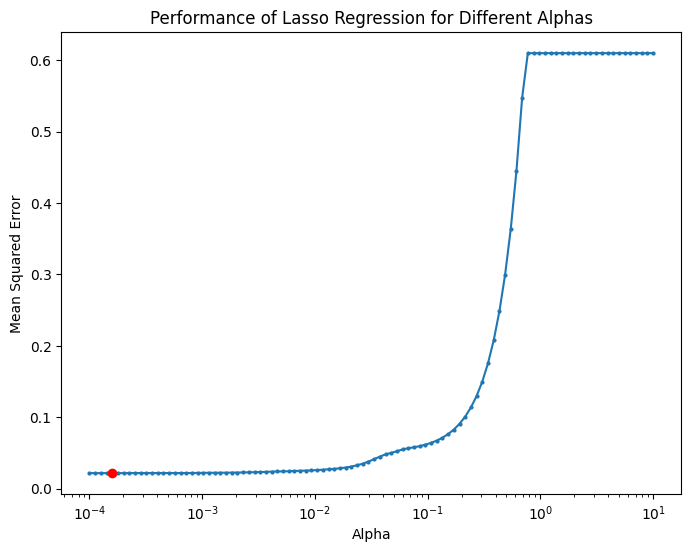

In [69]:
# Optional: Plot the performance of different alphas
import matplotlib.pyplot as plt

# Extract mean test scores for plotting
mean_scores = -results['mean_test_score']
alphas = param_grid[prefix + 'alpha']

plt.figure(figsize=(8, 6))
plt.plot(alphas, mean_scores, marker='o', markersize=2)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Performance of Lasso Regression for Different Alphas')

# Find the index of the minimum score
min_index = np.argmin(mean_scores)
min_alpha = alphas[min_index]
min_score = mean_scores[min_index]

# Highlight the point with the minimum mean squared error
plt.scatter(min_alpha, min_score, color='red', zorder=5, label=f'Min Alpha = {min_alpha:.2f}')
#plt.text(min_alpha - 0.02 , min_score + 0.001, f'Min Alpha = {min_alpha:.2f}', color='red')

plt.show()

In [70]:
# Get the coefficients
coefficients_cv = lasso_cv.coef_

# Identify the features with non-zero coefficients
non_zero_features_cv = np.where(coefficients_cv != 0)[0]

print(f"Features selected with LassoCV: {non_zero_features_cv}")
print(f"Coefficients: {coefficients_cv}")

AttributeError: 'Pipeline' object has no attribute 'coef_'

# Tarea

1. Probar Ridge y Lasso
2. Seleccionar variables on Lasso y entrenar el modelo usando solo las variables seleccionadas.
3. (Opcional) Investigar acerca de RandomSearch.

Usar Pipelines + GridSearch